<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/image_recognition_vgg16_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#
# Example of using a pre-trained model as a classifier.
#
# We'll use pretrained VGG16 model, available in Keras. 
# The input to its cov1 layer is of fixed size 224 x 224 RGB image.
#

In [35]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

from PIL import Image
import requests

<class 'PIL.JpegImagePlugin.JpegImageFile'>


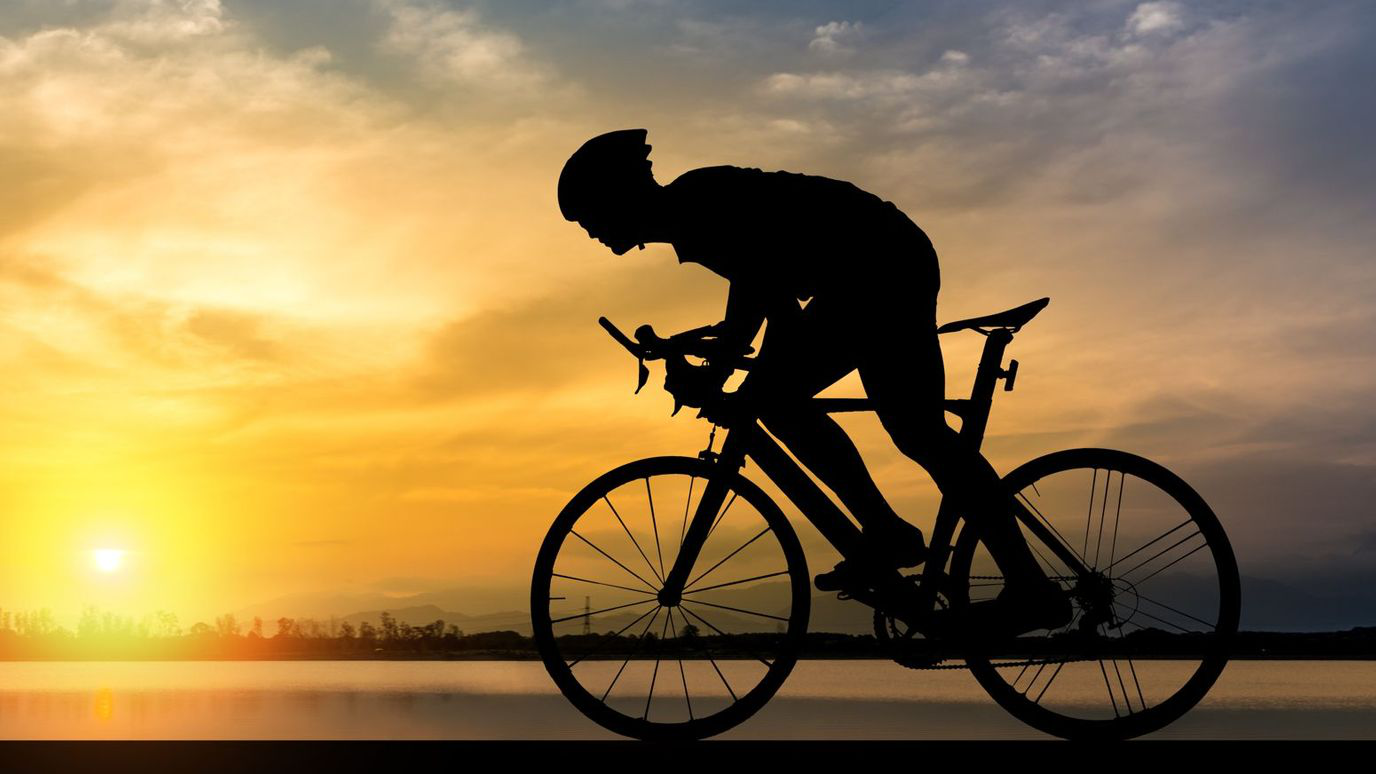

In [36]:
#
# Load test image
#

# url = 'https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/02/322868_1100-800x825.jpg' # dog
url = 'https://ychef.files.bbci.co.uk/1376x774/p07phq4b.jpg' # cyclist, bicycle
img = Image.open(requests.get(url, stream=True).raw)
print(type(img)) 
img

In [37]:
width, height = img.size
print(f'width = {width}, height = {height}')

width = 1376, height = 774


In [38]:
#
# Resize image to 224 x 224 (required by VGG16 model) 
#
img_resized = img.resize((224, 224))

width, height = img_resized.size
print(f'width = {width}, height = {height}')

width = 224, height = 224


In [39]:
#
# Image preprocessing
#

# Convert the image to a numpy.ndarray
img = img_to_array(img_resized)
print(f'type(img) = {type(img)}')
print(f'img.shape = {img.shape}')

# Reshape data for the model
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

# Prepare the image for the VGG model
img = preprocess_input(img)

type(img) = <class 'numpy.ndarray'>
img.shape = (224, 224, 3)


In [40]:
#
# Download pre-trained model and instantiate it
#
# pre-trained model (which contains all the learned weights) is in .h5 format 
# and will be automatically downloaded from:
# https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5
#

model = VGG16()

In [41]:
#
# Perform the inference 
# (predictions will contain probabilities across all classes)
#

predictions = model.predict(img)

In [42]:
# convert the probabilities to a list of class labels
label = decode_predictions(predictions)
print(f'len(label) = {len(label)}')
print(f'len(label[0]) = {len(label[0])}')
label

# To get the full list of all labels, use: 
#   decode_predictions(predictions, top=1000)

len(label) = 1
len(label[0]) = 5


[[('n03792782', 'mountain_bike', 0.7388531),
  ('n04482393', 'tricycle', 0.09600929),
  ('n02835271', 'bicycle-built-for-two', 0.06687097),
  ('n04509417', 'unicycle', 0.020188728),
  ('n04485082', 'tripod', 0.015324174)]]

In [43]:
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
label

('n03792782', 'mountain_bike', 0.7388531)

In [44]:
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

mountain_bike (73.89%)
